In [1]:
import os

os.listdir('../')

['.ipynb_checkpoints',
 'Anomaly Detection models',
 'baseline-model.ipynb',
 'DL models',
 'ML models']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve,average_precision_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_curve,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE



In [3]:
# creating a datframe to store our data

data = pd.read_csv('../../data/creditcard.csv', low_memory=False)

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# First baseline model selected features

In [6]:
# using the most important features already listed in the baseline model 

df = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
             'V11','V12','V13','V14','V16','V17','V21','V23','V27']]


In [7]:
# to know the frequency of different time recorded
data.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [8]:
data.loc[data['Class']==0, 'Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
154306.0     1
5380.0       1
105479.0     1
52741.0      1
90714.0      1
Name: Time, Length: 124479, dtype: int64

In [9]:
data.loc[data['Class']==1, 'Time'].value_counts()

68207.0     6
94362.0     4
85285.0     4
93860.0     4
84204.0     4
           ..
158638.0    1
125658.0    1
28692.0     1
15817.0     1
406.0       1
Name: Time, Length: 468, dtype: int64

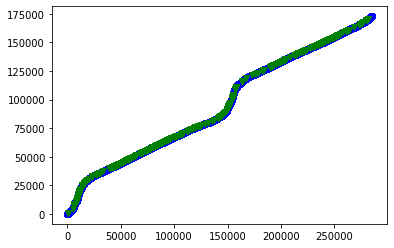

In [10]:
# plt.figure(figsize=(20,20))
plt.plot(data.loc[data['Class']==0, 'Time'], 'o',color= 'b')
plt.plot(data.loc[data['Class']==1, 'Time'], 'v', color= 'g' )

plt.show()


The above shows the spread of the fraud

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V16     284807 non-null  float64
 15  V17     284807 non-null  float64
 16  V21     284807 non-null  float64
 17  V23     284807 non-null  float64
 18  V27     284807 non-null  float64
dtypes: float64(19)
memory usage: 41.3 MB


In [12]:
# computing the class weight

val_count = data['Class'].value_counts()
weights = dict(1 / val_count)
weights

{0: 3.51722561243691e-06, 1: 0.0020325203252032522}

In [13]:
# adminstrative cost
admin_cost = 2.5

In [14]:
# defining a function to calculate cost savings
def cost_saving(ytrue, ypred, amount):
    fp = np.sum((ytrue == 0) & (ypred == 1))
    cost = np.sum(fp*admin_cost) + np.sum((amount[(ytrue == 1) & (ypred == 0)]))
    max_cost = np.sum((amount[(ytrue == 1)]))
    savings = 1 - (cost/max_cost)
    
    return savings

In [15]:
# the split

cv = StratifiedKFold(n_splits=4,shuffle=True,random_state =1)

In [16]:
# defining a function to calculate cost saving per fold (splits) of our cv
def cost_saving_per_split(scores, x, y, cv_object):
    results = []
    for i, (_, test_ind) in zip(range(cv_object.n_splits), cv_object.split(x, y)):
        ypred = scores['estimator'][i].predict(x[test_ind])
        ytrue = y[test_ind]
        amount = data['Amount'].values[test_ind]
        results.append(cost_saving(ytrue, ypred, amount))
        
    return results

In [17]:
# defining a function to return a dataframe of metrics results for each fold in our cv
def get_metric_scores(scores, x, y, cv_object=cv):
    ind = ['split_'+str(n) for n in range(1, cv_object.n_splits+1)]
    
    scores_credit = pd.DataFrame(index=ind)
    
    scores_credit['f1_score'] = scores['test_f1']
    scores_credit['auc_pr'] = scores['test_average_precision']
    scores_credit['cost_savings'] = cost_saving_per_split(scores, x, y, cv_object)

    return scores_credit


### Fraud Sensitive Model



#### using minmaxscaler

In [18]:
model = svm.LinearSVC()

minmax = MinMaxScaler()
MMscaled_ = minmax.fit_transform(df)
y= data.Class

In [19]:
fraud_sensitive_scores = cross_validate(model, MMscaled_, y, 
                                        scoring=['f1', 'average_precision'], 
                                        cv=cv, n_jobs=4, return_estimator=True)

In [20]:
fraud_sensitive_results = get_metric_scores(fraud_sensitive_scores, MMscaled_,y)
fraud_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.666667,0.699738,0.339043
split_2,0.719212,0.809325,0.424241
split_3,0.715686,0.789719,0.525291
split_4,0.702439,0.733629,0.409104


In [21]:
fraud_sensitive_results.mean()

f1_score        0.701001
auc_pr          0.758103
cost_savings    0.424420
dtype: float64

### Cost Sensitive Model

In [22]:
sample_weights = np.array([data['Amount'][ind] if fraud else admin_cost for ind, fraud in enumerate(y)])

In [23]:
cost_sensitive_model = svm.LinearSVC()
cost_sensitive_scores = cross_validate(cost_sensitive_model, MMscaled_, y, 
                                       scoring=['f1', 'average_precision'], 
                                       cv=cv, n_jobs=4, return_estimator=True, 
                                       fit_params={'sample_weight': sample_weights})

In [24]:
cost_sensitive_results = get_metric_scores(cost_sensitive_scores, MMscaled_, y)
cost_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.777328,0.689966,0.736774
split_2,0.816000,0.797832,0.756566
split_3,0.841202,0.771564,0.817012
split_4,0.806584,0.731759,0.735118


In [25]:
cost_sensitive_results.mean()

f1_score        0.810279
auc_pr          0.747780
cost_savings    0.761367
dtype: float64

In [26]:
%%time
smote = SMOTE()

for train_idx, test_idx, in cv.split(MMscaled_, y):
    X_train, y_train = MMscaled_[train_idx], y[train_idx]
    X_test, y_test = MMscaled_[test_idx], y[test_idx]
    X_train_oversampled, y_train_oversampled = smote.fit_sample(X_train, y_train)
    smote_gradient_model = svm.LinearSVC()
    smote_gradient_model.fit(X_train_oversampled, y_train_oversampled )  
    pred = smote_gradient_model.predict(X_test)
    print(f'roc_auc_score: {roc_auc_score(y_test, pred)}')
    print(f'f-score: {f1_score(y_test, pred)}')

roc_auc_score: 0.9249071541489905
f-score: 0.12899336949969858
roc_auc_score: 0.9565059694829422
f-score: 0.1279199110122358
roc_auc_score: 0.965740455741619
f-score: 0.14242239805234327
roc_auc_score: 0.9252376354203341
f-score: 0.1327543424317618
Wall time: 1min 37s


### Using a pipeline with minmaxscaler plus LinearSVC, and prescaled data

In [27]:
# creating a pipeline 
clf = make_pipeline(MinMaxScaler(),
                   svm.LinearSVC(tol=1e-5))

In [28]:
%%time
f1_pipeline_scores =[]
auc_pipeline_scores = []

for train, test in cv.split(MMscaled_, y):
#     df.reset_index(inplace=True)
    Xtr, ytr = MMscaled_[train], y[train]
    xte, yte = MMscaled_[test], y[test]
    clf.fit(Xtr,ytr)
    y_pred = clf.predict(xte)
    f1_pipeline_scores.append(f1_score(yte,y_pred))
    auc_pipeline_scores.append(roc_auc_score(yte,y_pred))
    print(classification_report(yte,y_pred))
print('F1_scores', f1_pipeline_scores)
print('roc_auc_scores', auc_pipeline_scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.55      0.67       123

    accuracy                           1.00     71202
   macro avg       0.92      0.78      0.83     71202
weighted avg       1.00      1.00      1.00     71202

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.59      0.71       123

    accuracy                           1.00     71202
   macro avg       0.96      0.79      0.86     71202
weighted avg       1.00      1.00      1.00     71202

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.59      0.72       123

    accuracy                           1.00     71202
   macro avg       0.95      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202

              preci

#Very good f1 scores 

### Fraud Sensistive Model

#### Using Standard Scaler

In [29]:
# using standardScaler 

fraud_sensitive_model = svm.LinearSVC()

Scale = StandardScaler()
SSscaled = Scale.fit_transform(df)

In [30]:
fraud_sensitive_scores = cross_validate(fraud_sensitive_model, SSscaled, y, 
                                        scoring=['f1', 'average_precision'], 
                                        cv=cv, n_jobs=4, return_estimator=True)

In [31]:
fraud_sensitive_results = get_metric_scores(fraud_sensitive_scores, SSscaled,y)
fraud_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.160584,0.628154,0.036421
split_2,0.801802,0.787664,0.666093
split_3,0.826087,0.780348,0.776389
split_4,0.649485,0.723842,0.364603


In [32]:
fraud_sensitive_results.mean()

f1_score        0.609489
auc_pr          0.730002
cost_savings    0.460876
dtype: float64

### Cost Sensitive Model

In [33]:
sample_weights = np.array([data['Amount'][ind] if fraud else admin_cost for ind, fraud in enumerate(y)])

In [34]:
cost_sensitive_model = svm.LinearSVC()
cost_sensitive_scores = cross_validate(cost_sensitive_model, SSscaled, y, 
                                       scoring=['f1', 'average_precision'], 
                                       cv=cv, n_jobs=4, return_estimator=True, 
                                       fit_params={'sample_weight': sample_weights})

In [35]:
cost_sensitive_results = get_metric_scores(cost_sensitive_scores, SSscaled,y)
cost_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.721461,0.679697,0.500724
split_2,0.805310,0.783174,0.687852
split_3,0.836207,0.770117,0.794888
split_4,0.813278,0.731691,0.735459


In [36]:
cost_sensitive_results.mean()

f1_score        0.794064
auc_pr          0.741170
cost_savings    0.679731
dtype: float64

In [37]:
# testing with balanced data
smote = SMOTE()

for train_idx, test_idx, in cv.split(SSscaled, y):
    X_train, y_train = SSscaled[train_idx], y[train_idx]
    X_test, y_test = SSscaled[test_idx], y[test_idx]
    X_train_oversampled, y_train_oversampled = smote.fit_sample(X_train, y_train)
    smote_gradient_model = svm.LinearSVC()
    smote_gradient_model.fit(X_train_oversampled, y_train_oversampled )  
    pred = smote_gradient_model.predict(X_test)
    print(f'roc_auc_score: {roc_auc_score(y_test, pred)}')
    print(f'f-score: {f1_score(y_test, pred)}')

C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score: 0.9249282574284401
f-score: 0.12922705314009664


C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score: 0.9559010088053863
f-score: 0.12208067940552014


C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


roc_auc_score: 0.9612955560611192
f-score: 0.13679245283018868
roc_auc_score: 0.9286484652038057
f-score: 0.12661195779601406


C:\Users\ADELEKE OLADAPO\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The smote gave a poor f1 score.

# Trying out new data

# Selected new features using feature selection

In [38]:
data.corr().Class

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [39]:
import seaborn as sns

<AxesSubplot:>

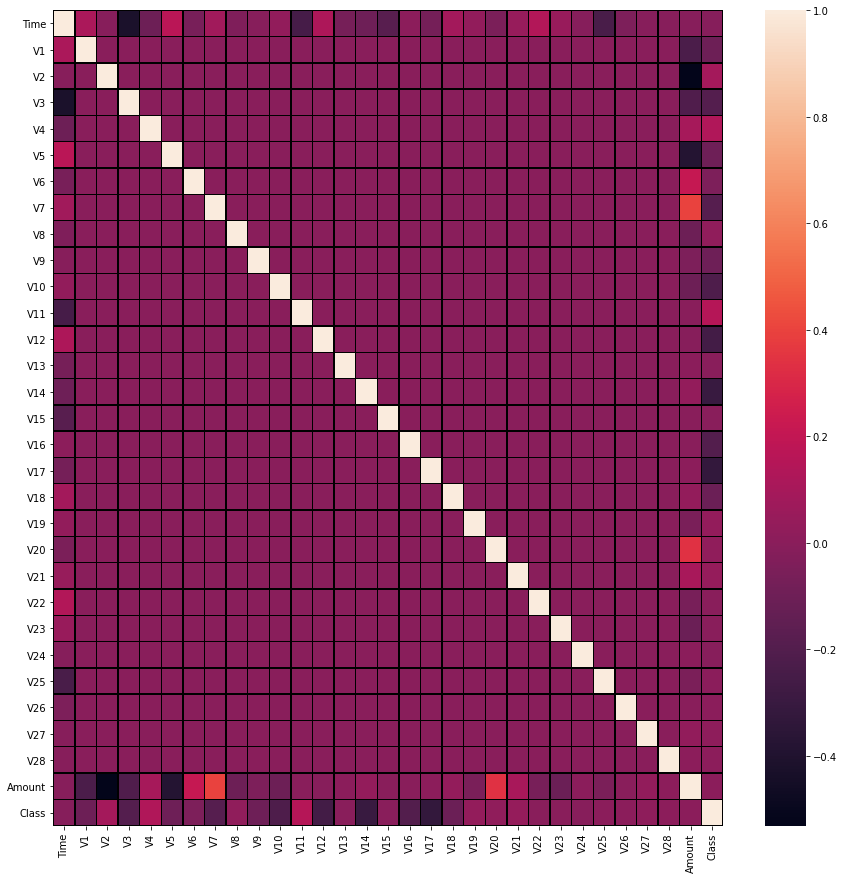

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), linecolor='k', linewidths=.4)


In [41]:
# Feature selection module 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


In [42]:
x =data.drop('Class', 1)
y = data.Class

In [43]:
best_feats = SelectKBest(score_func=f_classif, k= 20)
fit = best_feats.fit(x,y)
df_score = pd.DataFrame(fit.scores_)


In [44]:
# creating a dataframe to show our findings
df_columns = pd.DataFrame(x.columns)
important = pd.concat([df_columns, df_score], axis=1)

In [45]:
important.columns = ['Spec', 'Score']


In [46]:
important.sort_values('Score', ascending=False, )

,Spec,Score
17,V17,33979.168593
14,V14,28695.547788
12,V12,20749.822361
10,V10,14057.979985
16,V16,11443.349428
3,V3,11014.508305
7,V7,10349.605408
11,V11,6999.355047
4,V4,5163.832114
18,V18,3584.380605


In [47]:
# used 14 as the miniumum because it looked most reasonable as the least value for correlation

important_feats = list((important.loc[important.Score  > 14.0, 'Spec']))

In [48]:
# the most important fatures 
important_feats

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V27',
 'V28']

In [49]:
len(important_feats)

23

#### So there are 23 important features

In [50]:
new_df = data[important_feats]

In [51]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V16,V17,V18,V19,V20,V21,V24,V27,V28
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,4.626942,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,-0.509348,0.943651,0.823731
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,-1.016226,0.068472,-0.053527
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.640134,0.004455,-0.026561
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.449624,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.123205,0.108821,0.104533


# Fraud Sensitive Model

In [52]:
standard = StandardScaler()
scaled_new = standard.fit_transform(new_df)


In [53]:
scaled_new

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.11050692,
         0.33089162, -0.06378115],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.56113055,
        -0.02225568,  0.04460752],
       [-1.99656197, -0.69350046, -0.81157783, ..., -1.13809214,
        -0.13713686, -0.18102083],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  1.05694395,
         0.01103672, -0.0804672 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.20342782,
         0.26960398,  0.31668678],
       [ 1.64205773, -0.27233093, -0.11489898, ...,  0.01452561,
        -0.00598394,  0.04134999]])

In [63]:
model = svm.LinearSVC()
cv = StratifiedKFold(shuffle=True,random_state=1, n_splits=4)
fraud_sensitive_scores = cross_validate(model, scaled_new, y, 
                                        scoring=['f1', 'average_precision'], 
                                        cv=cv, n_jobs=4, return_estimator=True)

In [64]:
fraud_sensitive_results = get_metric_scores(fraud_sensitive_scores,scaled_new,y)
fraud_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.800000,0.712229,0.720077
split_2,0.659794,0.791516,0.353107
split_3,0.810573,0.795352,0.697981
split_4,0.805310,0.743542,0.692268


In [65]:
fraud_sensitive_results.mean()

f1_score        0.768919
auc_pr          0.760660
cost_savings    0.615858
dtype: float64

Note the improved scores due to new features selected

### Cost Sensitive Model

In [57]:
sample_weights = np.array([data['Amount'][ind] if fraud else admin_cost for ind, fraud in enumerate(y)])

In [66]:
%%time
cost_sensitive_model = svm.LinearSVC()
cost_sensitive_scores = cross_validate(cost_sensitive_model, scaled_new, y, 
                                       scoring=['f1', 'average_precision'], 
                                       cv=cv, n_jobs=4, return_estimator=True, 
                                       fit_params={'sample_weight': sample_weights})

Wall time: 2min 52s


In [67]:
cost_sensitive_results = get_metric_scores(cost_sensitive_scores, scaled_new, y)
cost_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.778243,0.670575,0.715228
split_2,0.822581,0.793841,0.757007
split_3,0.830508,0.754956,0.816492
split_4,0.785714,0.710346,0.647868


In [68]:
cost_sensitive_results.mean()

f1_score        0.804262
auc_pr          0.732429
cost_savings    0.734149
dtype: float64

## Bayes Mininmum Risk (BMR)

### Note: cost dependent classification is also called Bayes Mininmum Risk.
***see more about BMR [here](https://link.springer.com/article/10.1007/s42452-020-03375-w)***


In [69]:
from sklearn.calibration import CalibratedClassifierCV

# because LinearSVC doesnt have predict proba funcion 
cclf = CalibratedClassifierCV(base_estimator=svm.LinearSVC(penalty='l2', dual=False), cv=5)


In [70]:
bmr_model = cclf
bmr_scores = cross_validate(bmr_model, scaled_new, y,
                            cv=cv, n_jobs=4,
                            return_estimator=True)


### Calculating AUC PR curve is not possible for BMR because predictions are based on minimum expected cost and not on probability. For this reason, we will calculate only f1_score and cost-savings for this model.

In [71]:
# defining a function to predict based on the predicting that will minimize the expected cost.
def bmr_predict(model, x, trans_cost):
    prob = model.predict_proba(x)[:, 1]
        
    expected_cost_0 = prob * trans_cost
    expected_cost_1 = (1-prob) * admin_cost
        
    pred = (expected_cost_1 < expected_cost_0).astype(int)
    return pred


In [72]:
def get_bmr_metric_scores(scores, x, y=y, cv_object=cv):
    ind = ['split_'+str(n) for n in range(1, cv_object.n_splits+1)]
    scores_df = pd.DataFrame(index=ind)

    f1_results = []
    cs_results = []
    
    for i, (_, test_ind) in zip(range(cv_object.n_splits), cv_object.split(x, y)):
        amount = data['Amount'].values[test_ind]
        
        ypred = bmr_predict(scores['estimator'][i], x[test_ind], amount)
        ytrue = y[test_ind]
                
        f1_results.append(f1_score(ytrue, ypred))
        cs_results.append(cost_saving(ytrue, ypred, amount))
        
    scores_df['f1_score'] = f1_results
    #scores_df['auc_pr'] = scores['test_average_precision']
    scores_df['cost_savings'] = cs_results

    return scores_df    

In [73]:
bmr_results = get_bmr_metric_scores(bmr_scores, scaled_new,y)
bmr_results

,f1_score,cost_savings
split_1,0.641509,0.732866
split_2,0.689655,0.750969
split_3,0.742857,0.813648
split_4,0.629630,0.727988


In [74]:
bmr_results.mean()

f1_score        0.675913
cost_savings    0.756368
dtype: float64

# Using the new baseline model selected features

In [75]:
baseline_df = data.drop(['V25','Time','Amount', 'Class'], 1)

In [76]:
baseline_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,0.546668,0.108821,0.104533


# Fraud Sensitive Model

In [77]:
standard = StandardScaler()
scaled_base = standard.fit_transform(baseline_df)
model = svm.LinearSVC(tol= 1e-5, class_weight='balanced',
                     max_iter = 1500, random_state=1)

In [78]:
cv = StratifiedKFold(shuffle=True, random_state=1,n_splits=4)

In [79]:
%%time
fraud_sensitive_scores = cross_validate(model, scaled_base, y, 
                                        scoring=['f1', 'average_precision'], 
                                        cv=cv, n_jobs=4, return_estimator=True)

Wall time: 4min 37s


In [80]:
fraud_sensitive_results = get_metric_scores(fraud_sensitive_scores,scaled_base,y)
fraud_sensitive_results

,f1_score,auc_pr,cost_savings
split_1,0.743083,0.683361,0.703650
split_2,0.779923,0.772225,0.719289
split_3,0.787645,0.762658,0.806509
split_4,0.751938,0.712546,0.718814


In [81]:
fraud_sensitive_results.mean()

f1_score        0.765647
auc_pr          0.732698
cost_savings    0.737066
dtype: float64

Note the improved scores due to new features selected

### Cost Sensitive Model

In [82]:
sample_weights = np.array([data['Amount'][ind] if fraud else admin_cost for ind, fraud in enumerate(y)])

In [ ]:
%%time
cost_sensitive_model = svm.LinearSVC()
cost_sensitive_scores = cross_validate(cost_sensitive_model, scaled_base, y, 
                                       scoring=['f1', 'average_precision'], 
                                       cv=cv, n_jobs=4, return_estimator=True, 
                                       fit_params={'sample_weight': sample_weights})

In [ ]:
cost_sensitive_results = get_metric_scores(cost_sensitive_scores, scaled_base, y)
cost_sensitive_results

In [ ]:
cost_sensitive_results.mean()

## Bayes Mininmum Risk (BMR)

### Note: cost dependent classification is also called Bayes Mininmum Risk.
***see more about BMR [here](https://link.springer.com/article/10.1007/s42452-020-03375-w)***


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# because LinearSVC doesnt have predict proba funcion 
cclf = CalibratedClassifierCV(base_estimator=svm.LinearSVC(penalty='l2', dual=False), cv=5)


In [ ]:
bmr_model = cclf
bmr_scores = cross_validate(bmr_model, scaled_base, y,
                            cv=cv, n_jobs=4,
                            return_estimator=True)


### Calculating AUC PR curve is not possible for BMR because predictions are based on minimum expected cost and not on probability. For this reason, we will calculate only f1_score and cost-savings for this model.

In [ ]:
# defining a function to predict based on the predicting that will minimize the expected cost.
def bmr_predict(model, x, trans_cost):
    prob = model.predict_proba(x)[:, 1]
        
    expected_cost_0 = prob * trans_cost
    expected_cost_1 = (1-prob) * admin_cost
        
    pred = (expected_cost_1 < expected_cost_0).astype(int)
    return pred


In [ ]:
def get_bmr_metric_scores(scores, x, y=y, cv_object=cv):
    ind = ['split_'+str(n) for n in range(1, cv_object.n_splits+1)]
    scores_df = pd.DataFrame(index=ind)

    f1_results = []
    cs_results = []
    
    for i, (_, test_ind) in zip(range(cv_object.n_splits), cv_object.split(x, y)):
        amount = data['Amount'].values[test_ind]
        
        ypred = bmr_predict(scores['estimator'][i], x[test_ind], amount)
        ytrue = y[test_ind]
                
        f1_results.append(f1_score(ytrue, ypred))
        cs_results.append(cost_saving(ytrue, ypred, amount))
        
    scores_df['f1_score'] = f1_results
    #scores_df['auc_pr'] = scores['test_average_precision']
    scores_df['cost_savings'] = cs_results

    return scores_df    

In [ ]:
bmr_results = get_bmr_metric_scores(bmr_scores, scaled_base,y)
bmr_results

In [ ]:
bmr_results.mean()